# Lab 4 - Support Vector Machines and Neural Networks
In this lab we look at utilizing Support Vector Machines and Neural Networks. We present some worked examples showing the application of both SVMs and Neural Networks, and your tasks are to implement the methods on the Wine dataset.

For Support Vector Machines we will be looking at both the binary and multiclass classification problems using the SVM classifier. We will also visualise the decision boundary in the 2D case.

For Neural Networks we will be building a simple architecture using the tensorflow.keras API, with a variety of different layers within our network which you can explore and tune. 


<b>Important note:</b>

Unlike the previous labs, you will not be completing TODOs in skeleton code. We will instead focus on utilising the existing implementations of these algorithms over implementing our own. These two techniques are some of the more complex algorithms to implement from scratch, so we will use sklearn's svm.SVC and Tensorflow's Keras implementations to solve the presented problems. In this labsheet you should run the notebook and understand the different components of what is happening. You are then going to implement both a multiclass SVM and a neural network for the purpose of multiclass classification on the Wine dataset. 

There are <b>two</b> marked tasks at the end to complete. 

# Support Vector Machines for Binary Classification

Here we utilise SVMs for the classification problem on a 2-dimensional binary labelled version of the Fisher Iris problem. In this case we will use scikit-learn's built in SVM functionality contained in sklearn.svm and the <i>SVC</i> object. SVC here stands for a Support Vector Classifier, and despite the name difference they implement the same algorithm. 

Our tasks are:

<ul>
    <li>Load the data and labels.</li>
    <li>Convert the labels into a binary classification problem.</li>
    <li>Split the data into a training and testing set.</li>
    <li>Create an instance of the sklearn.svm.SVC object with a linear kernel.</li>
    <li>Fit the model to the training data given the binary training labels.</li>
    <li>Predict the class of the testing set observations.</li>
    <li>Report the percentage accuracy of the model on the testing set.</li>
    <li>Plot the decision boundary and margin to identify the support vectors.</li>
</ul>

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler # this is for normalising our data

### First let's create a function to let us split out dataset into a training and testing set. 
This will let us have some comparability between the methods and should be familiar from the last lab. We randomly choose samples from our matrix of data and allocate them into either the training or testing set.

In [6]:
# Define a function which takes in our dataset and labels, and returns a train/test split of the data
def train_test_split(data, labels, ratio=0.2):
    np.random.seed(5) # set random generator seed for reproducibility
    
    # Get sample indices for each set
    testing_indices = np.random.choice(np.arange(data.shape[0]), int(data.shape[0] * ratio), replace=False)
    training_indices = np.delete(np.arange(data.shape[0]), testing_indices)

    # Divide the dataset into the two sets.
    test_data = data[testing_indices, :] 
    test_labels = labels[testing_indices] 
    train_data = data[training_indices, :] 
    train_labels = labels[training_indices] 
    
    return train_data, train_labels, test_data, test_labels

### Let's train a binary classification Support Vector Machine on a 2D feature space. 
This will allow us to visualise the concept of this maximal margin being supported by the vectors (samples) within our training data. 

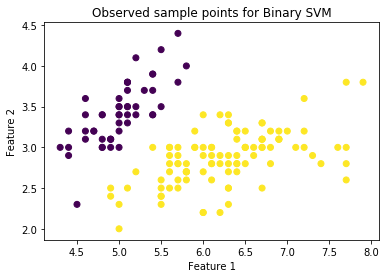

In [7]:
# Load the original Iris data and labels 
x = np.load('Iris_data.npy')
y = np.load('Iris_labels.npy')

# Create a binary class problem.
positive_class = 0 # This means we are interested in classifying class 0 vs. all other classes. Try changing this to another class if you want.

temp_class = np.max(y) + 1
y[y != positive_class] = temp_class
y[y != temp_class] = 0
y[y == temp_class] = 1

# Create a 2D dataset. This is just to aide in visualisation steps later on.
x = x[:, [0, 1]]

# Plot the data, colouring the samples by their binary label.
plt.scatter(x[:, 0], x[:, 1], c=y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Observed sample points for Binary SVM')
plt.show(block=False)

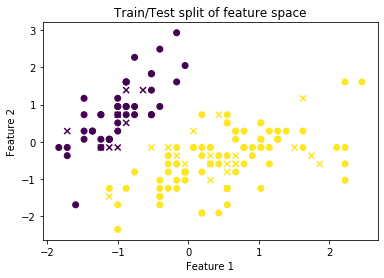

In [8]:
# Split the dataset into a training and testing set.
train_data, train_labels, test_data, test_labels = train_test_split(x, y, ratio=0.2)

# Normalise the data based on the training set
normaliser = StandardScaler().fit(train_data) # fit the data normalizer to the observed training samples
train_data = normaliser.transform(train_data)
test_data = normaliser.transform(test_data)

# Plot the training samples, then plot the testing samples with different marker shapes.
plt.scatter(train_data[:, 0], train_data[:, 1], marker='o', c=train_labels)
plt.scatter(test_data[:, 0], test_data[:, 1], marker='x', c=test_labels)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Train/Test split of feature space')
plt.show()

### Create an instance of the svm.SVC model with appropriate hyperparameters.
This model will be fit (or trained) on our training data and then evaluated on our testing data.

In [9]:
C = 1 # This is the penalty of the error term (Lecture 8, slide 18). 
kernel_type = 'linear' # This denotes the type of kernel used by our SVM (Lecture 8, slides 15/16)
model = SVC(kernel=kernel_type, C=C)

# Fit the model to the dataset, given the binary labels.
model.fit(train_data, train_labels)

# Use the model to predict the class of the test observations.
predicted_labels = model.predict(test_data)

### The following cell looks to visualise the model's decision boundary and highlights the support vectors. 
What do the lines correspond to? What parameter in the above cell would you change to tighten that boundary and margin?

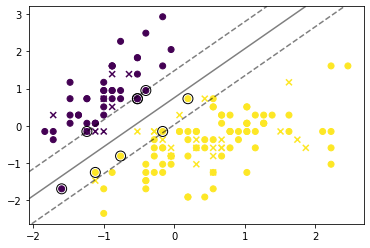

In [10]:
# Plot the training and testing data.
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, marker='o')
plt.scatter(test_data[:, 0], test_data[:, 1], c=test_labels, marker='x')

# Get axis limits and create a grid to evaluate the model upon.
ax = plt.gca()
xlimits = ax.get_xlim()
ylimits = ax.get_ylim()
xx = np.linspace(xlimits[0], xlimits[1], 90)
yy = np.linspace(ylimits[0], ylimits[1], 90)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

# Plot decision boundary and margins.
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

# Highlight the support vectors.
ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')

plt.show()

In [11]:
# Calculate the percentage accuracy rate on test set
accuracy = np.sum(np.equal(test_labels, predicted_labels)) / test_labels.shape[0] * 100
print('Percentage accuracy on testing set is: {0:.2f}%'.format(accuracy))

Percentage accuracy on testing set is: 100.00%


### Notice:

This example is a nice linearly seperable case and we can divide the two classes quite easily with a linear decision boundary. In the real world we may not have such a luxury, and we may want to use a different kernel instead of linear. For example; try changing the kernel above to a radial basis function by using <i>kernel='rbf'</i>, notice the difference in the decision boundary and the supporting vectors.

Notice also the penalty term <i>C</i>. Try raising or lowering this value, what effect does it have on the boundary and the margins produced?

# Support Vector Machines for Multiclass Classification

In this section we use svm.SVC in a multiclass approach, where we want to classify the original Fisher Iris data. This code is almost exactly the same as that above, however we retain the multiple classes in the labels and plot the decision boundaries for each class. 

Our tasks are:

<ul>
    <li>Load the data and labels.</li>
    <li>Split the data into a training and testing set.</li>
    <li>Create an instance of the sklearn.svm.SVC object with a linear kernel.</li>
    <li>Fit the model to the training data given the training labels.</li>
    <li>Predict the class of the testing set observations.</li>
    <li>Report the percentage accuracy of the model on the testing set.</li>
    <li>Plot the decision boundary and margin to identify the support vectors.</li>
</ul>

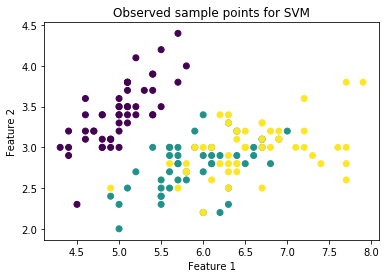

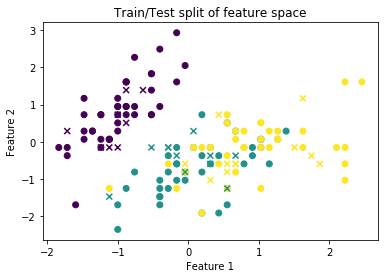

In [12]:
# Load the original Iris data and labels 
x = np.load('Iris_data.npy')
y = np.load('Iris_labels.npy')

# Create a 2D dataset. This is just to aide in visualisation steps later on.
# Try changing the data to explore more complex problems.
x = x[:, [0, 1]]

# Plot the data, colouring the samples by their binary label.
plt.scatter(x[:, 0], x[:, 1], c=y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Observed sample points for SVM')
plt.show(block=False)

# Select data points to divide into a training and testing set.
train_data, train_labels, test_data, test_labels = train_test_split(x, y, ratio=0.2)

# Normalise the data based on the training set
normaliser = StandardScaler().fit(train_data)
train_data = normaliser.transform(train_data)
test_data = normaliser.transform(test_data)

# Plot the training samples, then plot the testing samples with different marker shapes.
plt.scatter(train_data[:, 0], train_data[:, 1], marker='o', c=train_labels)
plt.scatter(test_data[:, 0], test_data[:, 1], marker='x', c=test_labels)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Train/Test split of feature space')
plt.show()

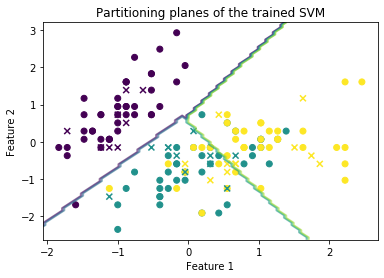

Percentage accuracy on testing set is: 83.33%


In [13]:
# Create an instance of the svm.SVC model with appropriate hyperparameters.
C = 1 # This is the penalty of the error term (Lecture 8, slide 18). 
model = SVC(kernel='linear', C=C)

# Fit the model to the dataset, given the binary labels.
model.fit(train_data, train_labels)

# Use the model to predict the class of the test observations.
predicted_labels = model.predict(test_data)

# Plot the training and testing data.
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, marker='o')
plt.scatter(test_data[:, 0],test_data[:, 1], c=test_labels, marker='x')

# Plot decision boundaries for each class
Z = model.predict(xy).reshape(XX.shape)
plt.contour(XX, YY, Z, alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Partitioning planes of the trained SVM')
plt.show()

# Calculate the percentage accuracy rate on test set
accuracy = np.sum(np.equal(test_labels, predicted_labels)) / test_labels.shape[0] * 100
print('Percentage accuracy on testing set is: {0:.2f}%'.format(accuracy))

# Neural Networks
In this section we use tensorflow.keras in a multiclass approach on the original Fisher Iris data. We will again load in the data and generate a training and testing set. We will then define a neural network architecture for the classification problem.

Keras has a lot of subsequent modules, including <i>layers</i> and <i>models</i> which contain their own functionality. We will use keras.layers to construct our architecture, and we will then bake this into a callable Model object from keras.models.

Our tasks are:

<ul>
    <li>Load the data and labels.</li>
    <li>Split the data into a training and testing set and normalise it to improve training.</li>
    <li>Create a Keras network architecture with a number of hidden layers.</li>
    <li>Fit the model to the training data.</li>
    <li>Predict the class of the testing set observations.</li>
    <li>Report the percentage accuracy of the model on the testing set.</li>
</ul>

In [15]:
import tensorflow.keras as keras
import tensorflow as tf
print(tf.__version__)

2.0.0


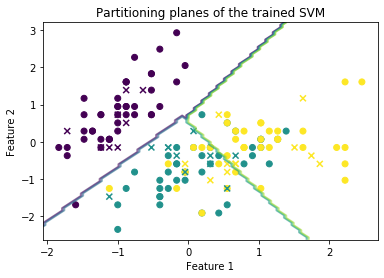

Percentage accuracy on testing set is: 83.33%


In [25]:
# Load the original Iris data and labels 
x = np.load('Iris_data.npy')
y = np.load('Iris_labels.npy')

# Make 2D to conform with the above experiments
x = x[:, [0, 1]]

# Find out the number of classes in the dataset
number_of_classes = np.max(y) + 1

# Select data points to divide into a training and testing set
train_data, train_labels, test_data, test_labels = train_test_split(x, y, ratio=0.2)

# Normalise the data based on the training set
normaliser = StandardScaler().fit(train_data)
train_data = normaliser.transform(train_data)
test_data = normaliser.transform(test_data)

# Create an instance of the svm.SVC model with appropriate hyperparameters.
C = 1 # This is the penalty of the error term (Lecture 8, slide 18). 
model = SVC(kernel='linear', C=C)

# Fit the model to the dataset, given the binary labels.
model.fit(train_data, train_labels)

# Use the model to predict the class of the test observations.
predicted_labels = model.predict(test_data)

# Plot the training and testing data.
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, marker='o')
plt.scatter(test_data[:, 0],test_data[:, 1], c=test_labels, marker='x')

# Plot decision boundaries for each class
Z = model.predict(xy).reshape(XX.shape)
plt.contour(XX, YY, Z, alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Partitioning planes of the trained SVM')
plt.show()

# Calculate the percentage accuracy rate on test set
accuracy = np.sum(np.equal(test_labels, predicted_labels)) / test_labels.shape[0] * 100
print('Percentage accuracy on testing set is: {0:.2f}%'.format(accuracy))

In [26]:
# Build our network architecture by stacking layers in a Keras Sequential object.
model = keras.Sequential()

# Create the input layer, this takes an argument of the input data shape (i.e. number of features)
model.add(keras.layers.InputLayer(input_shape=(train_data.shape[1],)))

# Create hidden layers
model.add(keras.layers.Dense(10, activation='sigmoid')) # first layer
model.add(keras.layers.Dense(10, activation='sigmoid')) # second layer

# Create output layer to get predicted class labels.
model.add(keras.layers.Dense(number_of_classes, activation='softmax'))

# Generate a callable keras Model object which contains our architecture.
# This allows us to train and predict our neural network on the datasets.
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['acc'])

# Fit our model to the data
history = model.fit(train_data, train_labels, validation_data=(test_data, test_labels), epochs=1000, verbose=0)

# Predict probabilities of classes for the testing set.
predicted_probabilities = model.predict(test_data)

# Use argmax to get the predicted class label
predicted_labels = np.argmax(predicted_probabilities, axis=1)

# Calculate the percentage accuracy rate on test set
accuracy = np.sum(np.equal(test_labels, predicted_labels)) / test_labels.shape[0] * 100
print('Percentage accuracy on testing set is: {0:.2f}%'.format(accuracy))

Percentage accuracy on testing set is: 70.00%


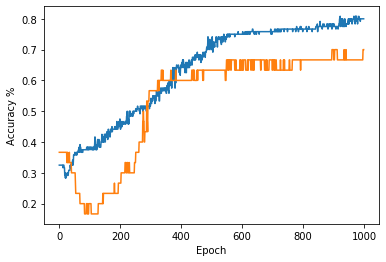

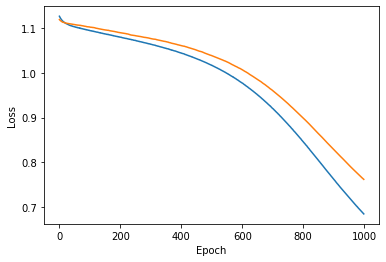

In [27]:
# Plot the training curves for model accuracy
plt.figure()
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('Accuracy %')
plt.xlabel('Epoch')

# Plot the training curves for the model's loss
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

# Marked Tasks
## Task 4.1
Load the full Wine dataset (*wineData.npy*, *wineLabels.npy*) and divide the data into training and testing splits. Use all 13 dimensions of the data.

Train a multiclass SVM on the training set and use the model to predict the class labels of the testing set. Print the percentage accuracy of your model. Do not visualise the boundaries as the dimensionality is too high.

In [36]:
x = np.load('wineData.npy')
y = np.load('wineLabels.npy')

# Create a 2D dataset. This is just to aide in visualisation steps later on.
# Try changing the data to explore more complex problems.
x = x#[:, [0, 1]]

# Plot the data, colouring the samples by their binary label.
#plt.scatter(x[:, 0], x[:, 1], c=y)
#plt.xlabel('Feature 1')
#plt.ylabel('Feature 2')
#plt.title('Observed sample points for SVM')
#plt.show(block=False)

# Select data points to divide into a training and testing set.
train_data, train_labels, test_data, test_labels = train_test_split(x, y, ratio=0.2)

C = 1 # This is the penalty of the error term (Lecture 8, slide 18). 
model = SVC(kernel='linear', C=C)

# Normalise the data based on the training set
normaliser = StandardScaler().fit(train_data)
train_data = normaliser.transform(train_data)
test_data = normaliser.transform(test_data)


# Plot the training samples, then plot the testing samples with different marker shapes.
#plt.scatter(train_data[:, 0], train_data[:, 1], marker='o', c=train_labels)
#plt.scatter(test_data[:, 0], test_data[:, 1], marker='x', c=test_labels)
#plt.xlabel('Feature 1')
#plt.ylabel('Feature 2')
#plt.title('Train/Test split of feature space')
#plt.show()
accuracy = np.sum(np.equal(test_labels, predicted_labels)) / test_labels.shape[0] * 100
print('Percentage accuracy on testing set is: {0:.2f}%'.format(accuracy))

Percentage accuracy on testing set is: 80.00%




## Task 4.2
Using the same dataset split as in 4.1, train a neural network on the training set and predict the class labels on the testing set. Again, print the percentage accuracy of your model. Define an architecture of your choosing, with a different number of hidden layers with a different number of neurons in each layer. Try and find a good network architecture. 

In [29]:
# Build our network architecture by stacking layers in a Keras Sequential object.
model = keras.Sequential()

# Create the input layer, this takes an argument of the input data shape (i.e. number of features)
model.add(keras.layers.InputLayer(input_shape=(train_data.shape[1],)))

# Create hidden layers
model.add(keras.layers.Dense(10, activation='sigmoid')) # first layer
model.add(keras.layers.Dense(10, activation='sigmoid')) # second layer

# Create output layer to get predicted class labels.
model.add(keras.layers.Dense(number_of_classes, activation='softmax'))

# Generate a callable keras Model object which contains our architecture.
# This allows us to train and predict our neural network on the datasets.
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['acc'])

# Fit our model to the data
history = model.fit(train_data, train_labels, validation_data=(test_data, test_labels), epochs=1000, verbose=0)

# Predict probabilities of classes for the testing set.
predicted_probabilities = model.predict(test_data)

# Use argmax to get the predicted class label
predicted_labels = np.argmax(predicted_probabilities, axis=1)

# Calculate the percentage accuracy rate on test set
accuracy = np.sum(np.equal(test_labels, predicted_labels)) / test_labels.shape[0] * 100
print('Percentage accuracy on testing set is: {0:.2f}%'.format(accuracy))

Percentage accuracy on testing set is: 80.00%


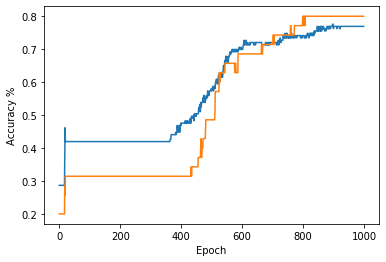

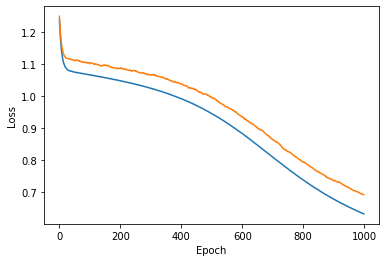

In [30]:
# Plot the training curves for model accuracy
plt.figure()
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('Accuracy %')
plt.xlabel('Epoch')

# Plot the training curves for the model's loss
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()